<a href="https://colab.research.google.com/github/ROARMarketingConcepts/SugarCRM/blob/master/Mintigo_Analysis_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mintigo Analysis

### This notebook performs a series of regressor analyses on Customer Scoring data provided by Mintigo. Algorithms considered include: linear regression, decision tree, and random forest.

Analysis perfomed by:

Ken Wood

Marketing Data Scientist

SugarCRM

kwood@sugarcrm.com

### Mount the Google Drive where the Mintigo data is located...

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### Set up the programming enviroment

In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import re
import locale
import numpy as np
import os
import tarfile
import hashlib
import pandas as pd
from six.moves import urllib
!pip install -U scikit-learn

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from pylab import scatter, show, legend, xlabel, ylabel
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.21.2)


### Load the Mintigo dataset...

In [0]:
df = pd.read_csv('//content/drive/My Drive/Colab Notebooks/Mintigo/Mintigo Data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 47 columns):
Mintigo - Annual Revenue 1M-10M                                                     230 non-null int64
Mintigo - Annual Revenue 10M-50M                                                    230 non-null int64
Mintigo - Annual Revenue 50M-100M                                                   230 non-null int64
Mintigo - Annual Revenue 100M-200M                                                  230 non-null int64
Mintigo - Annual Revenue 200M-1B                                                    230 non-null int64
Mintigo - Annual Revenue > 1B                                                       230 non-null int64
Mintigo - Number of Employees 10-50                                                 230 non-null int64
Mintigo - Number of Employees 50-200                                                230 non-null int64
Mintigo - Number of Employees 200-500                                  

In [5]:
df.head()

,Mintigo - Annual Revenue 1M-10M,Mintigo - Annual Revenue 10M-50M,Mintigo - Annual Revenue 50M-100M,Mintigo - Annual Revenue 100M-200M,Mintigo - Annual Revenue 200M-1B,Mintigo - Annual Revenue > 1B,Mintigo - Number of Employees 10-50,Mintigo - Number of Employees 50-200,Mintigo - Number of Employees 200-500,Mintigo - Number of Employees 500-1000,Mintigo - Number of Employees 1000-5000,Mintigo - Number of Employees > 10000,Mintigo - Company Profile: Number of Locations 10-50,Mintigo - Company Profile: Number of Locations 51-200,Mintigo - Company Profile: Number of Locations > 200,Mintigo - Marketing Automation Technology,Mintigo - Marketing Automation: Marketo,Mintigo - Marketing Automation: Hubspot,Mintigo - Marketing Automation: Pardot,Mintigo - Email Marketing: MailChimp,Mintigo - CRM: Salesforce,Mintigo - Intent Marketing - Microsoft Dynamics CRM,Mintigo - Intent Business - Sales Automation,Mintigo - Intent Marketing - CRM - Salesforce,Mintigo - Intent Marketing - Marketing Automation Tools,Mintigo - Intent Marketing - CRM,Mintigo - Intent Marketing - Sales Force Automation (SFA),Mintigo - Intent Business - Sales - Sales Software,Mintigo - Intent Marketing - Lead Generation Software,Mintigo - Intent Marketing - Internet Marketing Automation,Mintigo - Email Service: Microsoft Exchange,Mintigo - Email Service: Gmail,Mintigo - Software Suite: Google G suite,Mintigo - Software Suite: Microsoft Office 365,Mintigo - Intent Business - Sales - Proposal / Quote Generation,Mintigo - Intent Business - Sales - Sales Analytics,Mintigo - Intent Business - Sales - Effective Selling,Mintigo - Intent Business - Sales - Sales Performance,Mintigo - Intent Business - Sales - Sales Performance Management,Mintigo - Intent Business - Sales - Sales Productivity,Mintigo - Intent Marketing - Campaigns,Mintigo - Intent Business - Sales - Cross-Selling,Mintigo - Intent Business - Sales - Configure Price Quote (CPQ),Mintigo - Intent Technology - Messaging - Salesforce Chatter,Mintigo - Intent Business - Sales - Guided Selling,Mintigo - Intent Technology - Software Engineering - Quote And Proposal Software,Mintigo - Predictive Account Score
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,100
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,100
2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,100
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,100
4,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,100


In [6]:
df.describe()

,Mintigo - Annual Revenue 1M-10M,Mintigo - Annual Revenue 10M-50M,Mintigo - Annual Revenue 50M-100M,Mintigo - Annual Revenue 100M-200M,Mintigo - Annual Revenue 200M-1B,Mintigo - Annual Revenue > 1B,Mintigo - Number of Employees 10-50,Mintigo - Number of Employees 50-200,Mintigo - Number of Employees 200-500,Mintigo - Number of Employees 500-1000,Mintigo - Number of Employees 1000-5000,Mintigo - Number of Employees > 10000,Mintigo - Company Profile: Number of Locations 10-50,Mintigo - Company Profile: Number of Locations 51-200,Mintigo - Company Profile: Number of Locations > 200,Mintigo - Marketing Automation Technology,Mintigo - Marketing Automation: Marketo,Mintigo - Marketing Automation: Hubspot,Mintigo - Marketing Automation: Pardot,Mintigo - Email Marketing: MailChimp,Mintigo - CRM: Salesforce,Mintigo - Intent Marketing - Microsoft Dynamics CRM,Mintigo - Intent Business - Sales Automation,Mintigo - Intent Marketing - CRM - Salesforce,Mintigo - Intent Marketing - Marketing Automation Tools,Mintigo - Intent Marketing - CRM,Mintigo - Intent Marketing - Sales Force Automation (SFA),Mintigo - Intent Business - Sales - Sales Software,Mintigo - Intent Marketing - Lead Generation Software,Mintigo - Intent Marketing - Internet Marketing Automation,Mintigo - Email Service: Microsoft Exchange,Mintigo - Email Service: Gmail,Mintigo - Software Suite: Google G suite,Mintigo - Software Suite: Microsoft Office 365,Mintigo - Intent Business - Sales - Proposal / Quote Generation,Mintigo - Intent Business - Sales - Sales Analytics,Mintigo - Intent Business - Sales - Effective Selling,Mintigo - Intent Business - Sales - Sales Performance,Mintigo - Intent Business - Sales - Sales Performance Management,Mintigo - Intent Business - Sales - Sales Productivity,Mintigo - Intent Marketing - Campaigns,Mintigo - Intent Business - Sales - Cross-Selling,Mintigo - Intent Business - Sales - Configure Price Quote (CPQ),Mintigo - Intent Technology - Messaging - Salesforce Chatter,Mintigo - Intent Business - Sales - Guided Selling,Mintigo - Intent Technology - Software Engineering - Quote And Proposal Software,Mintigo - Predictive Account Score
count,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000
mean,0.530435,0.352174,0.039130,0.017391,0.004348,0.017391,0.452174,0.373913,0.065217,0.021739,0.008696,0.017391,0.104348,0.039130,0.004348,0.173913,0.043478,0.113043,0.026087,0.147826,0.043478,0.091304,0.086957,0.126087,0.073913,0.556522,0.026087,0.082609,0.073913,0.073913,0.408696,0.130435,0.139130,0.434783,0.056522,0.034783,0.091304,0.030435,0.060870,0.073913,0.517391,0.160870,0.178261,0.030435,0.091304,0.030435,91.469565
std,0.500161,0.478690,0.194328,0.131009,0.065938,0.131009,0.498793,0.484896,0.247448,0.146149,0.093047,0.131009,0.306378,0.194328,0.065938,0.379861,0.204376,0.317337,0.159742,0.355702,0.204376,0.288670,0.282386,0.332671,0.262200,0.497879,0.159742,0.275890,0.262200,0.262200,0.492665,0.337516,0.346837,0.496810,0.231430,0.183628,0.288670,0.172155,0.239612,0.262200,0.500787,0.368212,0.383567,0.172155,0.288670,0.172155,4.410828
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,85.000000
25%,0.000000,0.000000,0.000000,0.000000,0

### Let's see how each of Mintigo's independent variables correlate with the Predictive Account Score.

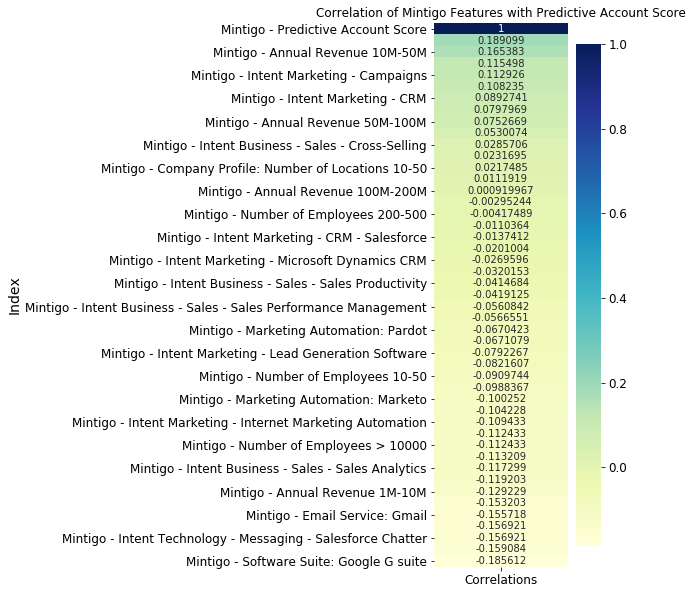

In [7]:
import seaborn as sns

corr = df.corrwith(df['Mintigo - Predictive Account Score']).reset_index()
corr.columns = ['Index','Correlations']
corr = corr.set_index('Index')
corr = corr.sort_values(by=['Correlations'], ascending = False)
plt.figure(figsize=(3,10))
fig = sns.heatmap(corr, annot=True, fmt="g", cmap='YlGnBu')
plt.title("Correlation of Mintigo Features with Predictive Account Score")
plt.show()

### Separate the dataframe into the 'X' matrix and 'y' vector....

In [0]:
y = df['Mintigo - Predictive Account Score']
X = df.drop(['Mintigo - Predictive Account Score'],axis = 1)

In [9]:
print("Shape of 'X' matrix: ",X.shape)
print("Shape of 'y' vector: ",y.shape)

Shape of 'X' matrix:  (230, 46)
Shape of 'y' vector:  (230,)


### The following code ensures that, when we get new data, we will add the appropriate amounts to the train and test sets. It also makes sure we don't move previous training samples over to the test set.

In [0]:
from sklearn.model_selection import train_test_split 

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.1, random_state = 42)

### Select and train a ML algorithm.
Let's first look at a linear regression.

In [11]:
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression() 
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Print out the regression coefficients...

In [12]:
for idx, col_name in enumerate(X_train.columns):
  print("The coefficient for {} is {}".format(col_name, lin_reg.coef_[idx]))

The coefficient for Mintigo - Annual Revenue 1M-10M is 1.0404746341354263
The coefficient for Mintigo - Annual Revenue 10M-50M is 2.3194012551863064
The coefficient for Mintigo - Annual Revenue 50M-100M is 2.053683255927355
The coefficient for Mintigo - Annual Revenue 100M-200M is 6.004557320435442
The coefficient for Mintigo - Annual Revenue 200M-1B is -5.076361254270963
The coefficient for Mintigo - Annual Revenue > 1B is 2.2430596808528014
The coefficient for Mintigo - Number of Employees 10-50 is 0.5933962768384885
The coefficient for Mintigo - Number of Employees 50-200 is 1.021287737728185
The coefficient for Mintigo - Number of Employees 200-500 is -0.07367264776876274
The coefficient for Mintigo - Number of Employees 500-1000 is -2.2051451211369932
The coefficient for Mintigo - Number of Employees 1000-5000 is -0.11687999752972719
The coefficient for Mintigo - Number of Employees > 10000 is 2.2430596808527894
The coefficient for Mintigo - Company Profile: Number of Locations 10

### Print out the intercept as well...

In [13]:
intercept = lin_reg.intercept_

print("The intercept for this model is {}".format(intercept))

The intercept for this model is 89.6216037681849


### Print out the $R^2$ statistic...

In [14]:
print("R2 for this model is: ",lin_reg.score(X_train,y_train))

R2 for this model is:  0.248735894084391


### Let's calculate the Root-Mean-Squared Error...

In [0]:
from sklearn.metrics import mean_squared_error

def Calculate_RMSE(X,y,model):
  predictions = model.predict(X)
  lin_mse = mean_squared_error(y,predictions)
  lin_rmse = np.sqrt(lin_mse)
  return lin_rmse

In [16]:
Calculate_RMSE(X_train,y_train,lin_reg)

3.7471588706789625

In [17]:
Calculate_RMSE(X_test,y_test,lin_reg)

5.235351250205508

### Let's calculate the mean absolute error...

In [0]:
from sklearn.metrics import mean_absolute_error

def Calculate_MAE(X,y,model):
  predictions = model.predict(X)
  lin_mae = mean_absolute_error(y,predictions)
  return lin_mae

In [19]:
Calculate_MAE(X_train,y_train,lin_reg)

3.077493948744825

In [20]:
Calculate_MAE(X_test,y_test,lin_reg)

4.520981944510195

### Let’s train a **DecisionTreeRegressor.** This is a powerful model, capable of finding potentially complex nonlinear relationships in the data.



In [21]:
from sklearn.tree import DecisionTreeRegressor 
tree_reg = DecisionTreeRegressor() 
tree_reg.fit(X_train,y_train) 

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

### Now that the DecisionTree model is trained, let’s evaluate it on the training set:



In [22]:
y_pred = tree_reg.predict(X_train)
lin_mse = mean_squared_error(y_train, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1.7370739221184779

One way to evaluate the efficacy of the Decision Tree model would be to use the train_test_split function to split the training set into smaller training and test sets, then train our model against the smaller training sets and evaluate them against the test set. 

We can accomplish this using **Scikit-Learn’s cross-validation** feature. The following code performs a K-fold cross-validation: meaning it randomly splits the training set into 10 distinct subsets called folds, then it trains and evaluates the Decision Tree model 10 times, picking a different fold for evaluation every time and training on the other 9 folds. The result is an array containing the 10 evaluation scores:

In [0]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg,X_train,y_train,scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [24]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [6.08832694 4.28884365 5.30773245 5.27045775 6.56819739 6.66152977
 6.65743408 5.72599515 5.58697021 5.66760531]
Mean: 5.782309269872028
Standard deviation: 0.7086804196936877


Now the Decision Tree doesn’t look as good as it did earlier. **In fact, it seems to perform worse than the Linear Regression model!** Notice that cross-validation allows us to get not only an estimate of the performance of our model, but also a measure of how precise this estimate is (i.e., its standard deviation). The Decision Tree has a score of approximately 5.78, generally ± 0.71. We would not have this information if we just used one validation set. But cross-validation comes at the cost of training the model several times, so it is not always possible.


### Let’s compute the same scores for the Linear Regression model just to be sure:


In [25]:
lin_scores = cross_val_score(lin_reg, X_train, y_train,scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [5.4668456  3.7043698  4.41457393 5.16648158 5.18326728 5.50389836
 8.20113094 4.91951501 6.63909898 3.50229513]
Mean: 5.270147660685656
Standard deviation: 1.3041559555914137


**We have verified that the Decision Tree model is overfitting and that it performs worse than the Linear Regression model.**


Let's try one more model: the **RandomForestRegressor**. Random Forests work by training many Decision Trees on random subsets of the features, then averaging out their predictions. **Building a model on top of many other models is called Ensemble Learning , and it is often a great way to push ML algorithms even further.**


In [26]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [27]:
y_pred = forest_reg.predict(X_train)
forest_mse = mean_squared_error(y_train, y_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

2.3603126302455117

In [28]:
y_pred_test = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, y_pred_test)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

5.538700328239261

In [29]:
forest_scores = cross_val_score(forest_reg, X_train, y_train,scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [4.3550466  3.88018604 4.26320268 4.25359926 5.62324627 6.12021538
 4.29623148 5.28955268 4.94158875 4.33564216]
Mean: 4.735851128968605
Standard deviation: 0.6884343688051869


Wow, this is much better: Random Forests look very promising. However, note that the score on the training set is still much lower than on the validation sets, meaning that the model is still overfitting the training set. Possible solutions for overfitting are to simplify the model, constrain it (i.e., regularize it), or get a lot more training data.


Let's write a function to compute a 95% confidence interval for the test RMSE:

In [0]:
from scipy import stats

def ComputeConfidenceInterval(y_pred_test):
  confidence = 0.95
  squared_errors = (y_pred_test - y_test) ** 2
  mean = squared_errors.mean()
  m = len(squared_errors)
  return np.sqrt(stats.t.interval(confidence, m - 1,loc=np.mean(squared_errors),
                         scale=stats.sem(squared_errors)))

In [31]:
conf_interval_grid = ComputeConfidenceInterval(y_pred_test)
print(conf_interval_grid)

[4.1792387  6.62482955]
